In [1]:
from mlwpy import *
%matplotlib inline

C:\Users\Ritik\OneDrive\Desktop\MLWPY\Classifiers\mlwpy.py:56: SyntaxWarning: invalid escape sequence '\c'
  return "{\centering\n%s\n\medskip}" % self.to_latex()


In [2]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(iris.data, 
                       columns=iris.feature_names)
iris_df['target'] = iris.target
display(pd.concat([iris_df.head(3),
                   iris_df.tail(3)]))


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1000,3.5000,1.4000,0.2000,0
1,4.9000,3.0000,1.4000,0.2000,0
2,4.7000,3.2000,1.3000,0.2000,0
147,6.5000,3.0000,5.2000,2.0000,2
148,6.2000,3.4000,5.4000,2.3000,2
149,5.9000,3.0000,5.1000,1.8000,2


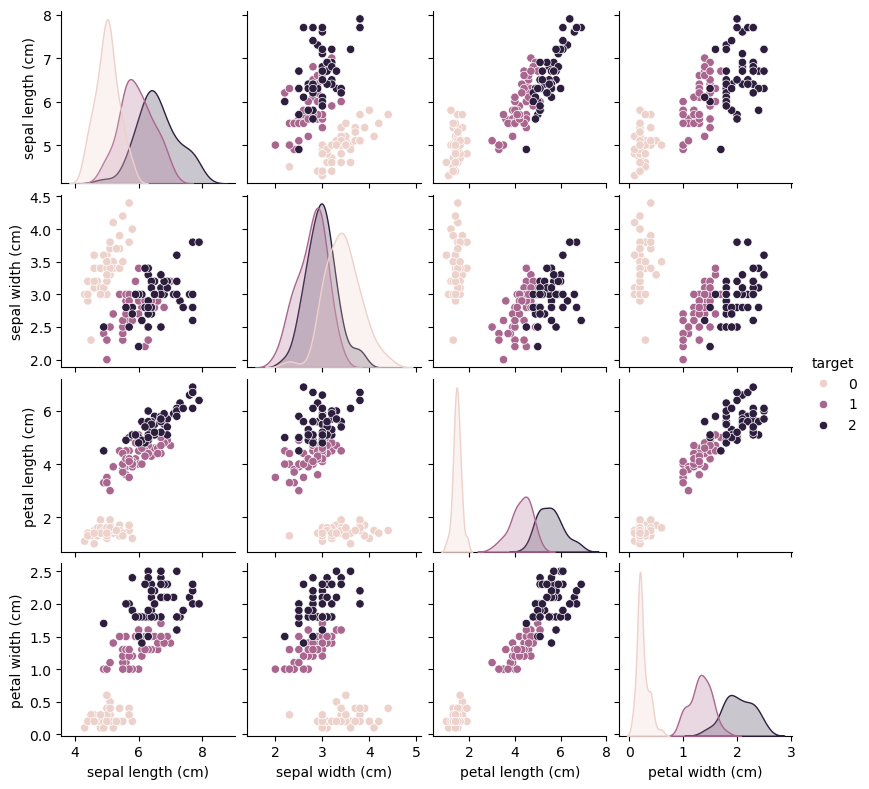

In [3]:
sns.pairplot(iris_df, hue='target', height=2);


In [4]:
print('targets:{}'.format(iris.target_names),
     iris.target_names[0], sep='\n')

targets:['setosa' 'versicolor' 'virginica']
setosa


In [5]:
#simple train and test split
(iris_ftrs_train, iris_ftrs_test,
 iris_tgt_train, iris_tgt_test) = skms.train_test_split(iris.data, iris.target,
                                                        test_size = .25)
print("Train features shape:", iris_ftrs_train.shape)
print("Test features shape:", iris_ftrs_test.shape)


Train features shape: (112, 4)
Test features shape: (38, 4)


In [6]:
answer_key = np.array([True, True, False, True])
student_answers = np.array([True, True, True, True])

correct = answer_key == student_answers
num_correct = correct.sum()
print("manual accuracy",num_correct/len(answer_key))

manual accuracy 0.75


In [7]:
print("sklearn accuracy:",
     metrics.accuracy_score(answer_key, student_answers))

sklearn accuracy: 0.75


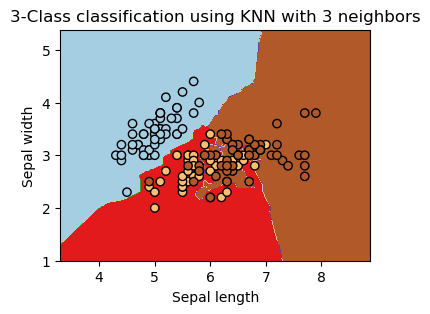

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets

# Load Iris dataset and select two features for visualization
iris = datasets.load_iris()
X = iris.data[:, :2]  # Taking only the first two features for 2D plotting
y = iris.target

# Create an instance of KNN classifier
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Create a mesh of points to plot in feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary (regions where predictions change)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('3-Class classification using KNN with 3 neighbors')

plt.show()


In [9]:
#default n_neighbors = 5
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
fit = knn.fit(iris_ftrs_train,iris_tgt_train)
preds = fit.predict(iris_ftrs_test)

print("3NN accuracy:",
     metrics.accuracy_score(iris_tgt_test,preds))


3NN accuracy: 1.0


In [10]:
nb = naive_bayes.GaussianNB()
fit = nb.fit(iris_ftrs_train,iris_tgt_train)
preds = fit.predict(iris_ftrs_test)

print("Accuracy:",
     metrics.accuracy_score(iris_tgt_test,preds))

Accuracy: 1.0


In [11]:
from sklearn import (datasets, metrics, model_selection as skms, naive_bayes, neighbors)

iris = datasets.load_iris()

(iris_train_ftrs, iris_test_ftrs, iris_train_tgt,iris_test_tgt) = skms.train_test_split(iris.data, iris.target, test_size = .90, random_state=42)

models = {
    'knn' : neighbors.KNeighborsClassifier(n_neighbors = 3),
    'nb' : naive_bayes.GaussianNB()}

for name, models  in models.items():
    fit = models.fit(iris_train_ftrs, iris_train_tgt)
    predictions = fit.predict(iris_test_ftrs)
    score = metrics.accuracy_score(predictions, iris_test_tgt)
    print("{:>3s}: {:.2f}".format(name,score))

knn: 0.96
 nb: 0.81


In [12]:
%timeit -r1 datasets.load_iris()

908 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)


In [13]:
pip install memory_profiler

Note: you may need to restart the kernel to use updated packages.


In [14]:
%load_ext memory_profiler

In [15]:
%%memit
nb = naive_bayes.GaussianNB()
fit = nb.fit(iris_train_ftrs,iris_train_tgt)

preds = fit.predict(iris_test_ftrs)

peak memory: 232.34 MiB, increment: 0.05 MiB


In [16]:
!type scripts\knn_memtest.py

import memory_profiler, sys
from mlwpy import *

@memory_profiler.profile(precision=4)

def knn_memtest(train, train_tgt, test):
    knn   = neighbors.KNeighborsClassifier(n_neighbors=3)
    fit   = knn.fit(train, train_tgt)
    preds = fit.predict(test)

if __name__ == "__main__":
    iris = datasets.load_iris()
    tts = skms.train_test_split(iris.data,
                                iris.target,
                                test_size=.25)
    (iris_train_ftrs, iris_test_ftrs,
     iris_train_tgt,  iris_test_tgt) = tts
    tup = (iris_train_ftrs, iris_train_tgt, iris_test_ftrs)
    knn_memtest(*tup)


In [17]:
!python scripts\knn_memtest.py

Filename: C:\Users\Ritik\OneDrive\Desktop\MLWPY\Classifiers\scripts\knn_memtest.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     4 197.3008 MiB 197.3008 MiB           1   @memory_profiler.profile(precision=4)
     5                                         
     6                                         def knn_memtest(train, train_tgt, test):
     7 197.3008 MiB   0.0000 MiB           1       knn   = neighbors.KNeighborsClassifier(n_neighbors=3)
     8 197.4648 MiB   0.1641 MiB           1       fit   = knn.fit(train, train_tgt)
     9 197.6094 MiB   0.1445 MiB           1       preds = fit.predict(test)




In [38]:
import functools as ft
import memory_profiler
from mlwpy import *

def nb_go(train_ftrs,test_ftrs,train_tgt):
    nb = naive_bayes.GaussianNB()
    fit = nb.fit(train_ftrs,train_tgt)
    pred = fit.predict(test_ftrs)

def split_data(dataset):
    split = skms.train_test_split(dataset.data,dataset.target,test_size=.25)
    return split[:-1] #don't need test tgt

def msr_mem(go, args):
    base = memory_profiler.memory_usage()[0]
    mu = memory_profiler.memory_usage((go, args), max_usage=True)
    print("{:<3}:~{:.4f} MiB".format(go.__name__,mu-base))

if __name__ == "__main__":
    msr = msr_mem
    go = nb_go

    sd = split_data(datasets.load_iris())
    msr(go, sd)
    

nb_go:~0.0039 MiB
